# SPD Steuerreformvorschlag von 2024

Das Handelsblatt nennt die [SPD Steuerreform](https://www.capital.de/wirtschaft-politik/spd-fluegel-will-spitzensteuersatz-fuer-topverdiener-erhoehen--35122776.html).

* Demnach wird die Grenze des Spitzensteuersatzes von 42 auf 45 Prozent erhöht, greift aber erst bei 80.000 Euro statt ca. 67000 Euro (Steuerklasse 1)
* Zusätzlich wird der "Reichensteuerstatz" von 45 auf 48 Prozent erhöht, die Schwelle bleibt bei ca. 270.000 Euro (Steuerklasse 1).

Die Auswirkung inkl. Solidaritätszuschlag sind in der Grafik unten abgebildet. Hierbei werden die Steuersätze für das Jahr 2025 zu Grunde gelegt und die Ersparnis gegenüber dem SPD Vorschlag errechnet.

## Fazit (Steuerklasse 1)

* In unteren Lohngruppen ist faktisch kein Unterschied zu erkennen
* Die Entlastung startet bei 40.000 Euro und erzielt sein Maximum bei 70.000 Euro mit 400 Euro
* Bis zu 90.000 Euro zu versteuerndes Einkommen ist die Reform neutral
* Über 90.000 zahlen alle drauf


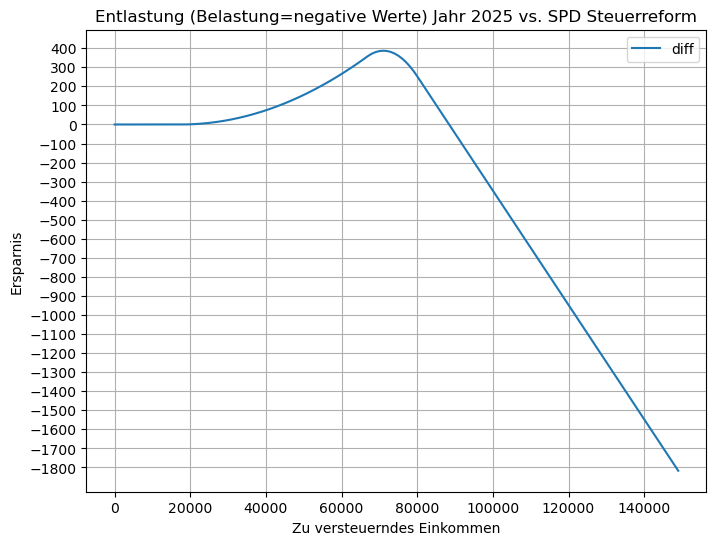

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# https://www.finanz.de/steuern/einkommensteuertabelle/
stufen_2024=[
	(0,0)
,	(11639, 0)
,	(11640, 14)
,	(17005, 24)
,   (66760, 42)
,   (277834, 42)
,   (277835, 45)
,   (500000, 45)
]

stufen_2025=[
	(0,0)
,	(12083, 0)
,	(12084, 14)
,	(17430, 24)
,   (66760, 42)
,   (277834, 42)
,   (277835, 45)
,   (500000, 45)
]

stufen_spd=[
	(0,0)
,	(12083, 0)
,	(12084, 14)
,	(17430, 24)
,   (80000, 45)
,   (277834, 45)
,   (277835, 48)
,   (500000, 48)
]

# https://www.buhl.de/steuer/ratgeber/solidaritaetszuschlag/?utm_source=google&utm_medium=cpc&utm_account=805-460-2329&utm_campaign=Search_|_DSA_|_Allgemein&utm_content=Mix&utm_term=&utm_matchtype=&utm_network=g&utm_device=c&utm_devicemodel=&utm_creative=493735552241&utm_adposition=&utm_locphysical=9068325&utm_campaignid=12142323487&utm_adgroupid=116310866305&gclid=EAIaIQobChMIiriVrfyKiQMViZGDBx0RkgJ_EAAYASAAEgJgn_D_BwE&wbraid=Cj8KCQjwvKi4BhDtARIuAG5tEVNPD3AbQyDK_epFvZWhK1MDgz7MLo7ICkjxaWdqd8uBKyenRyCuMIV0FBoCVmE&gad_source=1
soli_stufen=[
	(0,0)
,	(16955,0)
,	(16956,0)
,	(31527,5.5)
,	(100000,5.5)
]

def get_params(stufen):
	params=list()
	for i,s in enumerate(stufen[:-1]):
		m={ "von": s[0], "bis": stufen[i+1][0], "start": s[1], "steigung": (stufen[i+1][1]-s[1])/(stufen[i+1][0]-s[0])}
		params.append(m)
	return params


def get_steuer(params, wert):
	steuer=0
	for p in params:		
		if wert>p["bis"]:
			delta=p["bis"]-p["von"]
		elif wert>p["von"]:
			delta=wert-p["von"]
		else:
			break
		proz_eff=delta*p["steigung"]/2+p["start"]
		steuer+=delta*proz_eff/100
	return steuer
	

if __name__=="__main__":
	params_a=get_params(stufen_2025)
	params_b=get_params(stufen_spd)
	params_s=get_params(soli_stufen)
	werte=[v for v in range(0,150000,1000)]
	steuer_a=[get_steuer(params_a,v) for v in werte]	
	steuer_b=[get_steuer(params_b,v) for v in werte]
	soli_a=[get_steuer(params_s,v) for v in steuer_a]
	soli_b=[get_steuer(params_s,v) for v in steuer_b]
	summe_a=np.array(steuer_a)+np.array(soli_a)
	summe_b=np.array(steuer_b)+np.array(soli_b)
	
	diff=[(steuer_a[i]-steuer_b[i]) for i in range(len(werte))]	
	plt.figure(figsize=(8, 6))
	plt.yticks(np.arange(-1800, 500, 100))
	plt.plot(werte, diff, label="diff")
	plt.xlabel('Zu versteuerndes Einkommen')
	plt.ylabel('Ersparnis')
	plt.title('Entlastung (Belastung=negative Werte) Jahr 2025 vs. SPD Steuerreform')
	plt.legend()
	plt.grid(True)
	plt.show()